In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
# %matplotlib inline

## Gaussian kernel vs. Bernoulli process

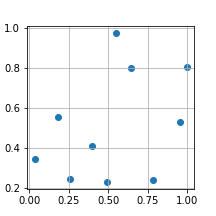

In [6]:
n = 10
X = np.random.rand(n, 2)

plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1])
plt.grid(), plt.show();

In [3]:
def gauss(sigma):
    def kernel(tau):
        return np.exp(-np.sum(tau**2, axis=-1)/sigma**2)
    return kernel

def KernelMatrix(x,y,h):
    return h(x[:,None]-y[None,:])

In [4]:
K = KernelMatrix(X,X,gauss(2))
print(f"first 5 cols,rows:\n{K[:5,:5]}")

first 5 cols,rows:
[[1.         0.98517997 0.97546944 0.985002   0.96077705]
 [0.98517997 1.         0.9279209  0.94183009 0.9028821 ]
 [0.97546944 0.9279209  1.         0.99675589 0.98392021]
 [0.985002   0.94183009 0.99675589 1.         0.99088999]
 [0.96077705 0.9028821  0.98392021 0.99088999 1.        ]]


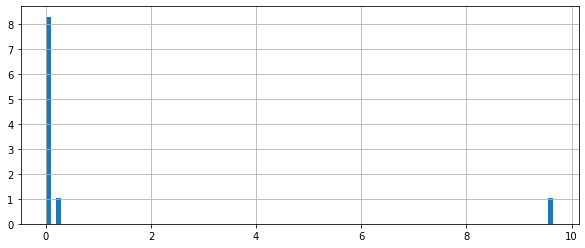

In [5]:
w, v = np.linalg.eigh(K)
    
plt.figure(figsize=(10,4))
plt.hist(w,100, density=True)
plt.grid();

(100, 100)


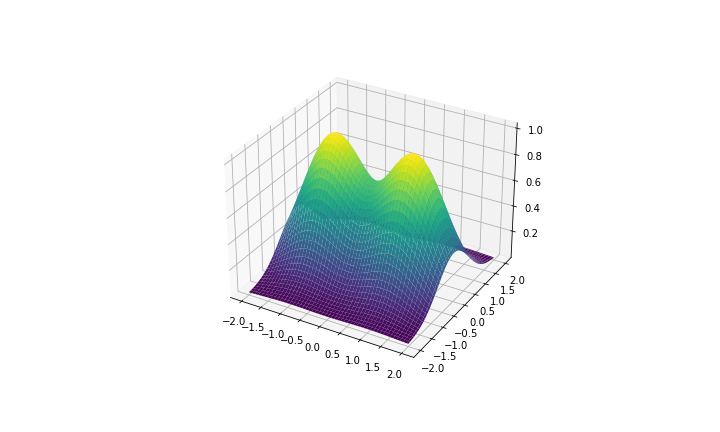

In [35]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

nb_discr = 100
x, y = np.linspace(-2, 2, nb_discr), np.linspace(-2, 2, nb_discr)
xx, yy = np.meshgrid(x, y)
xy = np.array([xx, yy]).transpose(1,2,0)

mu_1 = [-1,0]
mu_2 = [1,0]
C = 0.5
zz = np.exp( -np.sum((xy - mu_1)**2, axis=-1)/(2*C)) + np.exp( -np.sum((xy - mu_2)**2, axis=-1)/(2*C))
print(zz.shape)

surf = ax.plot_surface(xx, yy, zz, cmap="viridis")
plt.show()

In [6]:
e = np.exp(1)
2*np.exp(2) * np.sum([(e/3)**m * (m+2)**(3/2) for m in range(10000000)])

7818.976554834865

In [5]:
2*np.exp(2) * np.sum( [ (np.exp(1)/3)**m * (m+2)**(3/2) for m in range(1000000) ] )


7818.976554834865

In [27]:
def f(x):
    return (1+x**2)/(x**4+3*x**2+1)**.5
f(0.4)

1.0499999999999998

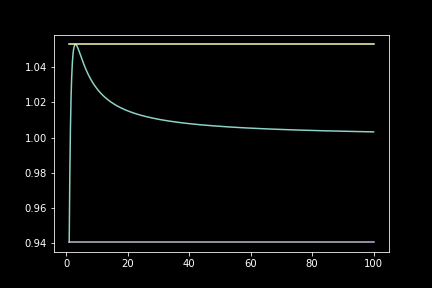

In [36]:
def approx(u, alpha):
    return (u+alpha)/np.sqrt(u**2+1)

x = np.linspace(1,100,1000)
alpha = .33
plt.figure()
plt.plot(x, approx(x, alpha))
plt.plot(x, np.ones_like(x)*np.sqrt(alpha**2+1))
plt.plot(x, np.ones_like(x)*(1+alpha)/2**.5)
plt.show()

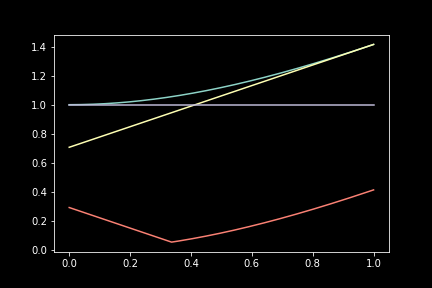

In [34]:
plt.figure()
alphas = np.linspace(0,1,1000)
plt.plot(alphas, np.sqrt(alphas**2+1))
plt.plot(alphas, (1+alphas)/2**.5)
plt.plot(alphas, np.ones_like(alphas)*1)
plt.plot(alphas, np.maximum(np.sqrt(alphas**2+1)-1, 1-(1+alphas)/2**.5))
plt.show()